# ANOVA

In [72]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 
import pandas as pd
from scipy.stats import ttest_ind 
from scipy.stats import f_oneway, levene, f
%matplotlib inline
sns.set()

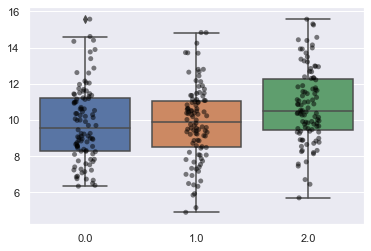

In [77]:
nk = 100
group1 = np.random.normal(loc=10, scale=2, size=nk)
group2 = np.random.normal(loc=9.8, scale=2, size=nk)
group3 = np.random.normal(loc=10.8, scale=2, size=nk)
group_total = np.concatenate([group1, group2, group3])

#sns.distplot(group1)
#sns.distplot(group2)

sns.stripplot(y=np.concatenate([group1, group2, group3]), x=np.concatenate([np.ones(nk)*0, np.ones(nk)*1, np.ones(nk)*2]), color='black', alpha=0.5)
sns.boxplot(y=np.concatenate([group1, group2, group3]), x=np.concatenate([np.ones(nk)*0, np.ones(nk)*1, np.ones(nk)*2]))


In [78]:
# test if variance is the same across groups
levene(group1, group2, group3)

LeveneResult(statistic=0.09228414667135997, pvalue=0.9118721511107823)

### from scratch
$
F = \frac{MS_B}{MS_W}
$

where,  
$
\begin{align}
MS_B &= \frac{\text{Sum of squares between sample} (SS_B)}{(k-1)}\\
MS_W &= \frac{\text{Sum of squares within sample} (SS_W)}{(n_T-k)}
\end{align}
$  

where,

$
k = \text{number of groups} \\
n_T = \text{total number of observations}
$

where,   
$
\begin{align}
SS_B &= \sum_k n_k(\bar{x_k} - \bar{x})^2\\
SS_W &= \sum_{i, k} (x_{i, k} - x_k)^2 \text{ or } \sum_k (n_k - 1)s_k^2
\end{align}
$

In [79]:
ssb = nk*((np.mean(group1) - np.mean(group_total))**2  + (np.mean(group2) - np.mean(group_total))**2 + (np.mean(group3) - np.mean(group_total))**2)
ssw = (nk - 1) *(np.var(group1, ddof=1) + np.var(group2, ddof=1) + np.var(group3, ddof=1))
f_statistic = (ssb/2)/(ssw/297)
print("f = {}".format(f_statistic))
print("pvalue = {}".format(1- f.cdf(f_statistic, dfn=2, dfd=297)))

f = 7.405205847758665
pvalue = 0.0007270708652387103


In [81]:
#scipy
f_oneway(group1, group2, group3)

F_onewayResult(statistic=7.405205847758672, pvalue=0.0007270708652387322)

### Tukey's test

### Bonferroni correction

In [11]:
n_features = 9
classes = make_classification(n_samples=100, n_classes=2, n_features = n_features, n_informative= 3, n_clusters_per_class= 1, random_state=3)

In [3]:
df = pd.DataFrame(data = classes[0])
df['target'] = classes[1]
df

,0,1,2,3,4,5,6,7,8,target
0,1.790510,0.659637,-0.086379,-0.397754,0.943783,0.421525,-0.980947,-0.303648,0.083806,1
1,-0.098507,-1.670620,0.505474,2.960432,1.239736,0.038291,0.195759,-0.606438,0.379888,1
2,0.555205,-0.652953,0.506340,0.539991,1.052379,0.857980,0.716751,0.273427,0.447165,1
3,-0.009553,1.210071,1.567534,-0.085521,1.030794,1.279900,-1.146806,1.127027,1.041331,1
4,0.861093,0.778984,-0.999842,-1.252494,1.252560,-4.509481,-1.066092,-5.418334,-0.868498,1
...,...,...,...,...,...,...,...,...,...,...
95,1.604833,1.394609,-0.951014,0.139283,0.027399,-0.955485,0.512538,-1.298804,-0.590799,0
96,-0.324886,-1.164195,1.987817,0.275398,0.058350,-0.017729,0.976539,0.791328,1.039304,0
97,-3.050257,-0.727332,-0.671496,-0.022184,1.910749,-2.855179,0.904644,-4.219721,-0.468429,0
98,0.573358,0.769151,2.069312,0.199960,1.088656,-0.744214,-0.494511,-0.550894,1.101023,0


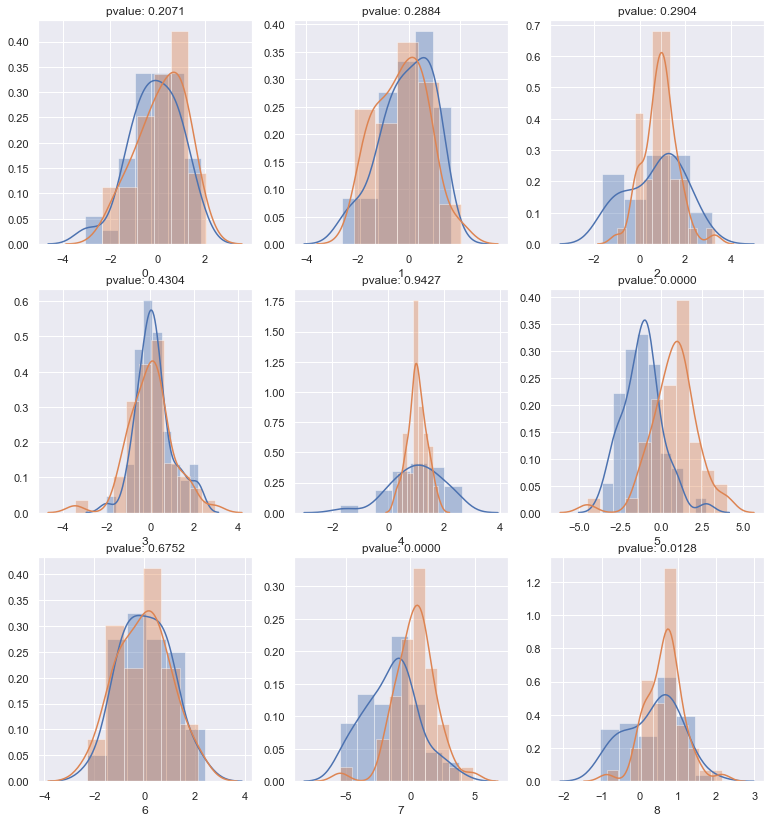

In [14]:
fig, ax = plt.subplots(n_features//3, 3, figsize=(13, 14))
for i in range(n_features):
    plt.subplot(n_features // 3, 3, i + 1)
    ttest_result = ttest_ind(df[df.target==0].iloc[:, i], df[df.target==1].iloc[:, i], equal_var=False)
    for j in range(df.target.unique().shape[0]):
        sns.distplot(df[df.target==j].iloc[:, i])
    plt.title("pvalue: {:.4f}".format(ttest_result[1]))

In [150]:
plt.title

'pvalue: 0.0'

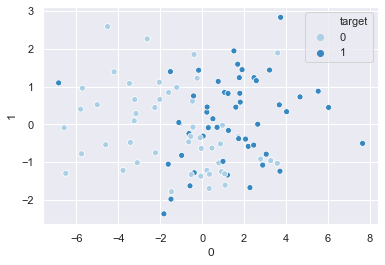

In [105]:
from sklearn.decomposition import PCA
X = classes[0]
pca  = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
pca.singular_values_
df_pca = pd.DataFrame(X_reduced)
df_pca['target'] = classes[1]
sns.scatterplot(data=df_pca, x=0, y=1, hue='target', palette="Blues")

In [74]:
df.target.unique().shape

(3,)